# Task 3 Softmax Regression & Optimization

In [5]:
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

1. Derive a formula for the gradient ∂L
∂θ(c)
j
. To do so, just derive the solution for
a single example Li and apply the chain rule of calculus ∂L
∂θ =
∂L
∂p
∂p
∂g
∂g
∂θ with
g = θ0 +
PD
j=1 θjxj
. For this task it is enough if you report derivatives of
each chain rule component alone to get full points. (3P)

Report each chain rule component derivative for a single L

1. ∂L/∂p

$$\frac{∂L_i}{∂p} = \sum_{c=1}^C\frac{1}{p(c|x)}*\mathbb{1}[y_i = c]$$

2. ∂p/∂g

$$\frac{∂p(g_i)}{∂g_j} = \quad p(g_i) * (1 - p(g_i)) \quad if \ i = jp\\
\quad-p(g_i) * p(g_j) \quad if \ i \ \neq j$$

3. ∂g/∂θ

$$\frac{∂g}{∂θ} = \begin{pmatrix}1\cr x_1\cr x_2\cr ...\cr x_D\cr\end{pmatrix}$$

load dataset

In [6]:
data = load_digits()
x, y = (data.images / 16.0).reshape(-1, 8 * 8), data.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

In [7]:
def softmax(logits):
    # Subtract the maximum element from each element to improve numerical stability
    logits -= np.max(logits) 
    # Calculate the softmax. The transpose is necessary, so that each row will be divided by its sum correctly
    sm = (np.exp(logits).T / np.sum(np.exp(logits), axis=1)).T
    return sm

In [8]:
# Helper function to one hot encode class labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [9]:
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

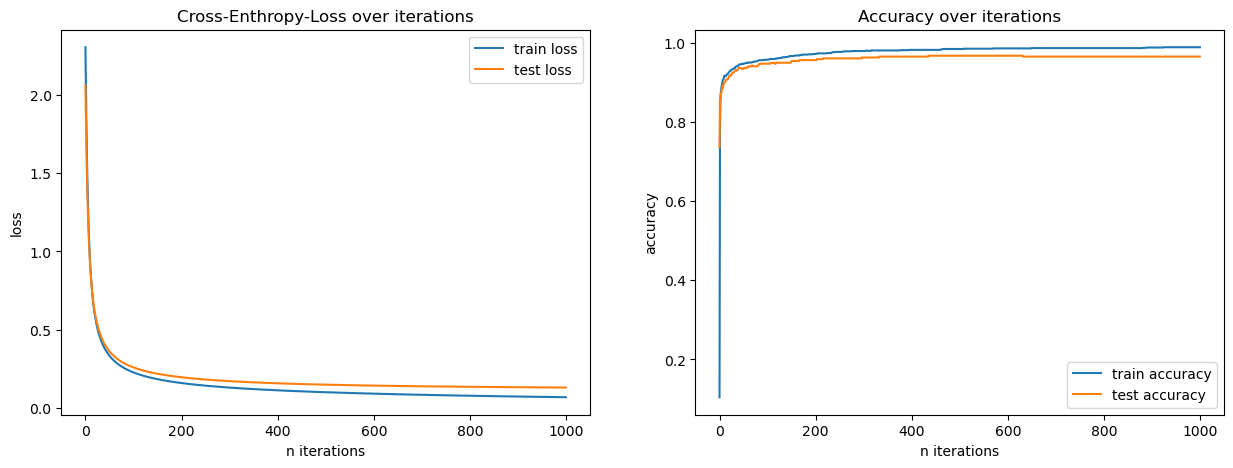

Final test accuracy: 0.9644


In [10]:
# Initialize parameters
weights = np.ones((1,10,x.shape[1])) #np.random.normal(0,1,size=(1,10,x.shape[1]))
bias = np.zeros((1,10))

lr = 0.001
num_iterations = 1000
n = x.shape[0] # Sample number

weights = np.reshape(weights, (64, 10)) # Reshape weights, so that they match dimensions with xtrain
ytrain_one_hot = one_hot_encode(ytrain, weights.shape[1]) # One hot encode ytrain for 10 classes
ytest_one_hot = one_hot_encode(ytest, weights.shape[1]) # One hot encode ytrain for 10 classes

train_losses = np.zeros(num_iterations)
train_accuracies = np.zeros(num_iterations)
test_losses = np.zeros(num_iterations)
test_accuracies = np.zeros(num_iterations)

for i in range(num_iterations):
    ### Optimization ###
    # Prediction
    score_train = xtrain @ weights + bias # Calculate dot product between data points and weights
    y_train_pred = softmax(score_train) # Predicted class probabilities
    
    # Calculate the gradients
    gradients = xtrain.T @ (y_train_pred - ytrain_one_hot)
    bias_gradient = np.mean(y_train_pred - ytrain_one_hot, axis=0)
    
    # Optimization with weight and bias updates
    weights = weights - lr * gradients
    bias = bias - lr * bias_gradient

    ### Visualization ###
    # Compute the cross-entropy loss
    train_losses[i] = cross_entropy_loss(ytrain_one_hot, y_train_pred)
    train_accuracies[i] = np.mean(np.argmax(y_train_pred, axis=1) == ytrain)
    #accuracies[i] = np.mean( y_pred == one_hot_encode(ytrain, y_pred.shape[1]))

    # Compute loss and accuracy for test split
    score_test = xtest @ weights + bias
    y_test_pred = softmax(score_test)
    test_losses[i] = cross_entropy_loss(ytest_one_hot, y_test_pred)
    test_accuracies[i] = np.mean(np.argmax(y_test_pred, axis=1) == ytest)

# Plot accuracies and losses over n iterations
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(range(num_iterations), train_losses, label="train loss")
axs[0].plot(range(num_iterations), test_losses, label="test loss")
axs[0].set_title("Cross-Enthropy-Loss over iterations")
axs[0].set_xlabel("n iterations")
axs[0].set_ylabel("loss")
axs[0].legend()

axs[1].plot(range(num_iterations), train_accuracies, label="train accuracy")
axs[1].plot(range(num_iterations), test_accuracies, label="test accuracy")
axs[1].set_title("Accuracy over iterations")
axs[1].set_xlabel("n iterations")
axs[1].set_ylabel("accuracy")
axs[1].legend()

plt.show()

print("Final test accuracy:", round(test_accuracies[-1], 4))